# Kolis Nr.2 2021-10-26

Sprendimus siųskite (vardas_pavarde_k2.ipynb; ipynb ir pdf/html formatais)
iki 2021-11-07 23:55 į avoicikas@gmail.com

Įveskite savo vardą ir pavardę

## Viktorija Povilionytė II kolis

Vertinimas

- Komentarai (veiksmų planas ir paaiškinimas) 25 %
- Programos kodas 25 %
- Rezultatas 25 %
- Grafikai 25 %

---
>> **1. UŽDUOTIS**
>>
>> Išvalykite, pataisykite ir vizualizuokite duomenis (exam/K2/unclean.csv) naudodami **pandas pakuotę**
>>
>> - Importavimas
>> - Sukūrimas tvarkingos struktūros
>> - Sutvarkymas ir atstatymas trūkstamų duomenų
>> - Nupaišymas grafikų
>>

---

In [1]:
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import os

## Pirmoji užduotis.
> - Netvarkingų duomenų importavimas
> - Tvarkingos struktūros sukūrimas
> - Trūkstamų duomenų atstatymas
> - Grafikų pavaizdavimas

## Eiga
- Pradžioje reikia importuoti duomenis.
- Norint importuoti, pirma susirandam, kur yra mūsų failas:
     - `os.path.expanduser('~')` naudojame, kad patektume į namų direktoriją.
     - `os.path.join` padeda sukurti kelią iki mūsų failo.
- Norint atidaryti failą naudojame pandas pakuotę, `pd.read_csv()`.
- `csv` rodo, kad mūsų failo tipas yra 'coma separated values'.
- Papildomai reikia nurodyti `pd.read_csv()`, kad:
    - `index_col` nurodo, kad stulpeliai bus naudojami, kaip eilučių pavadinimai, pateikiami kaip str vardas arba kaip stulpelio indeksas.
    - reikia praleisti 5 eilutes, tam naudojam `skiprows`, nes tik po 5 eilutės prasideda reikalingi duomenys.
    - `sep` nurodo skyriklį.

In [2]:
direktorija = os.path.expanduser("~")
failas = os.path.join(direktorija,'Desktop','programavimas','biod2021','exam','K2','unclean.csv')
filas = pd.read_csv(failas, index_col=0, skiprows = 5, sep=';') 
filas


A       B                    C
0                       0,0V   1,0cm                0,0ms
1      0,012566287931117902V   1,0cm              0,001ms
2      0,025132079766705215V   1,0cm              0,002ms
3       0,03769687943081635V   1,0cm              0,003ms
4       0,05026019088667496V   1,0cm              0,004ms
...                      ...     ...                  ...
9995   -0,06282151815625048V  -1,0cm  9,995000000000001ms
9996   -0,05026019088667673V  -1,0cm              9,996ms
9997   -0,03769687943082601V  -1,0cm              9,997ms
9998   -0,02513207976672276V  -1,0cm              9,998ms
9999  -0,012566287931114913V  -1,0cm              9,999ms

[10000 rows x 3 columns]

- Patikriname lentelės duomenų tipą, naudodami `.dtypes`.

In [3]:
filas.dtypes

A    object
B    object
C    object
dtype: object

- Patikriname, kokius turime stulpelius, naudodami `.columns`.

In [4]:
filas.columns

Index(['A', 'B', 'C'], dtype='object')

- Kadangi `python` neatpažįsta kablelių, turime juos pakeisti taškais, naudodami `.str.replace()`.
- Norint nubraižyti grafiką turime panaikinti šalia skaičių esančias raides, taip pat naudojame `.str.replace`.

In [5]:
filas['A'] = filas['A'].str.replace(',','.')
filas['B'] = filas['B'].str.replace(',','.')
filas['C'] = filas['C'].str.replace(',','.')
filas['A'] = filas['A'].str.replace('V','')
filas['B'] = filas['B'].str.replace('cm','')
filas['C'] = filas['C'].str.replace('ms','')

- Reikia pakeisti turimų duomenų tipą į `float`, naudojant funkciją `.astype()`, kad duomenis atpažintu, kaip skaičius.

In [6]:
filas['A'] = filas['A'].astype(float)
filas['B'] = filas['B'].astype(float)
filas['C'] = filas['C'].astype(float)

- Norint nubraižyti grafiką, naudojame `.plot()`.
- Kad grafikas atrodytų gražiau duodame jam ir ašims pavadinimą. 

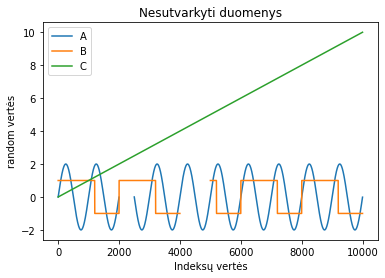

In [7]:
filas.plot(title='Nesutvarkyti duomenys',xlabel='Indeksų vertės',ylabel='random vertės');

- Su funkcija `.isnull()` patikriname ar yra ne skaičių (`NaN - not a number`)

In [8]:
filas.isnull()

A      B      C
0     False  False  False
1     False  False  False
2     False  False  False
3     False  False  False
4     False  False  False
...     ...    ...    ...
9995  False  False  False
9996  False  False  False
9997  False  False  False
9998  False  False  False
9999  False  False  False

[10000 rows x 3 columns]

- Norint sutvarkyti duomenis, kiekvieną grafiką nusibraižome atskirai.
- Atkurti duomenis naudojame `.interpolate()` ir `polynomial` metodą, kuris aprašo lygtimi ir jos pagalba suskaičiuoja trūkstamas vertes.
- `order=` nurodome, kokio laipsnio polinomas. Šis metodas ne visiškai tiklsiai atkartoja duomenis,nes gali būti, kad tai yra sinusinės periodinės kintamos srovės grafikas, o jo funkcija nėra polinomas.
- `plot()` papildome:
    - `style`- nurodo grafiko stilių
    - `color`-nurodo spalvą
    - `title`- duoda grafikui pavadinimą
    - `x= y=`- x ir y ašims priskiriame lentelės stulpelius iš kurių duomenų braižomas grafikas
    - `x/ylabel`- duoda pavadinimą x ir y ašims
    - `plt.legend`-sukuria legendą, toje grafikoe vietoje, kurioje nurodome naudodami `loc`
- `;` naudojame, kad virš grafiko nebūtų jokių užrašų

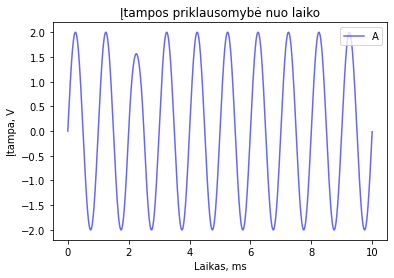

In [9]:
filas.interpolate(method="polynomial", order=2).plot(
alpha=0.6, style="-", color="blue", title="Įtampos priklausomybė nuo laiko",x='C',y='A',
    xlabel='Laikas, ms',ylabel='Įtampa, V'
)
plt.legend(loc='upper right');

- Kartojame žingsnius, kaip ir aukščiau esančiame grafike, tačiau šį kartą naudojame `backfill` metodą, nes gauname panašiausias vertes į jau turimas.

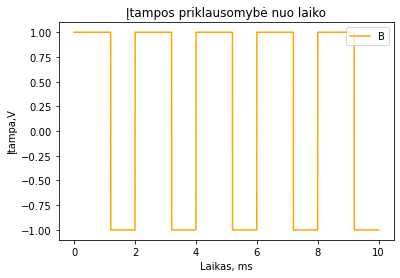

In [10]:
filas.interpolate(method="backfill").plot(
    title='Įtampos priklausomybė nuo laiko',color='orange',xlabel='Laikas, ms',ylabel='Įtampa,V',x='C',y='B')
plt.legend(loc='upper right');

- Radau periodinės kintamosios srovės [grafikus](https://www.vle.lt/straipsnis/kintamoji-elektros-srove/) (a ir c), kuriuose yra parodyta srovės priklausomybė nuo laiko ir jie buvo labai panašūs į mums duotus, todėl manau, kad galbūt mūsų grafikai taip pat vaizduoja ne įtampos priklausomybę nuo laiko, o srovės priklausomybę, todėl turėtume tiek 'A', tiek 'B' stulpelius laikyti srovės vertėmis su vienetais `amperais`. 

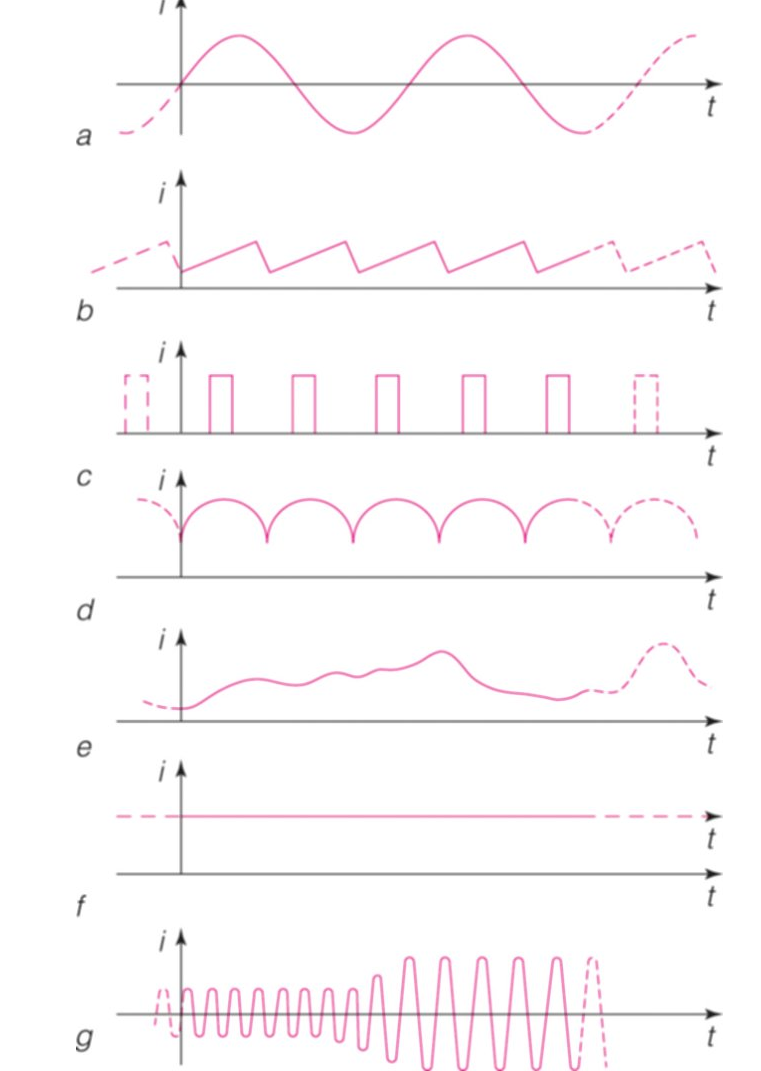



- Norint nubraižyti patvarkytus grafikus vienas ant kito:
    - sukuriam vardus interpoliuojamiems grafikų duomenims
    - nubraižome grafikus naudodami `plt.plot`, nurodydami, kad vienas grafikas bus iš 'A' ir 'C' stulpelių, kitas - iš 'B' ir 'C'
    - kaip ir anksčiau nurodome spalvas, linijos tipą, pavadiname ašis

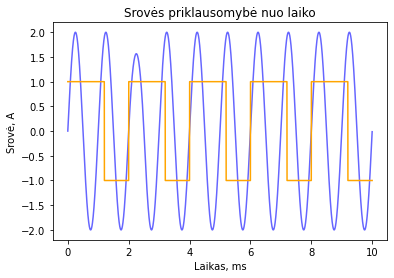

In [11]:
polynomial = filas.interpolate(method="polynomial",order=2)
backfill = filas.interpolate(method="backfill")
plt.plot(polynomial['C'], polynomial['A'], '-',color='blue',alpha=0.6)
plt.plot(backfill['C'], backfill['B'], '-',color='orange')
plt.title('Srovės priklausomybė nuo laiko')
plt.xlabel('Laikas, ms')
plt.ylabel('Srovė, A');

---
>> **2. UŽDUOTIS**
>>
>> Parašykite funkcijas kurios sugeneruotų šiuos grafikus.
>>
>> a)
>>
>> ![waveA](waveA.png)
>>
>> b)
>>
>> ![waveB](waveB.png)
>>
>>
---

## Antroji užduotis

### a dalis

- Pradžioje nusibraižome visus grafikus atskirai (tai nėra būtina, bet man lengviau taip buvo juos susitvarkyti):
 - triukšmo grafikui naudojom `np.random.randn` funkciją
 - `np.linspace` padeda nustatyti grafiko pradžią,pabaigą,žingsnį (tai naudinga paskui jungiant grafikus)
 - sinusoidės grafikui naudojam `np.sin`, kad sinusoidė atitiktų reikiamą grafiką dar pridedame 1
 - triukšmui, panašiam į eksponentę naudojame `np.power` ir `np.random.normal`
- Kai susitvarkome visus grafikus, juos braižome vienoje vietoje (rašome `plt.plot` funkcijas viename langelyje).
- Kad grafikas atrodytų tvarkingiau:
 - pavadiname jį `plt.title`
 - uždedame pavadinimus ašims `plt.label`,`y.label`
 - sukuriame legendą `plt.legend`
 - papildome grafiką patikslinančiais žodžiais `plt.text`
 - panaikiname dešinę bei viršutinę linijas `plt.gca().spines['top'].set_visible(False)`,`plt.gca().spines['right'].set_visible(False)`.


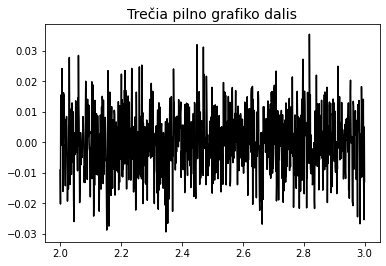

In [12]:
sample_rate=1000
noise = 1/100*np.random.randn(sample_rate)
t = np.linspace(2, 3, sample_rate)
plt.plot(t,noise,'black')
plt.title('Trečia pilno grafiko dalis',fontsize=14);

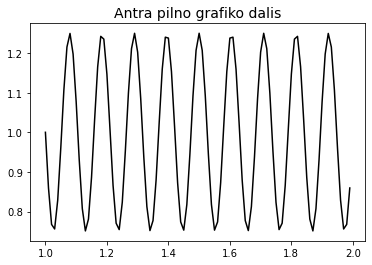

In [13]:
t1 = np.arange(1, 2, 0.01)
amplitude =1+ 1/4*np.sin(38 * np.pi/2 * t1)
plt.plot(t1,amplitude,'black')
plt.title('Antra pilno grafiko dalis',fontsize=14);

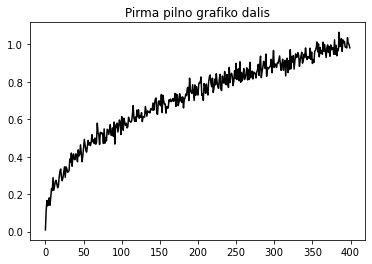

In [14]:
def funkc(x, alfa,beta):
    return alfa*np.power(x,beta)
x_fun = np.linspace(start=0, stop=1, num=400)  
y_fun = funkc(x_fun, 50, 0.4)
noise_new = 1.5 * np.random.normal(size=y_fun.size)
y_fun = 1/50*(y_fun + noise_new)
plt.plot(y_fun,'black')
plt.title('Pirma pilno grafiko dalis');

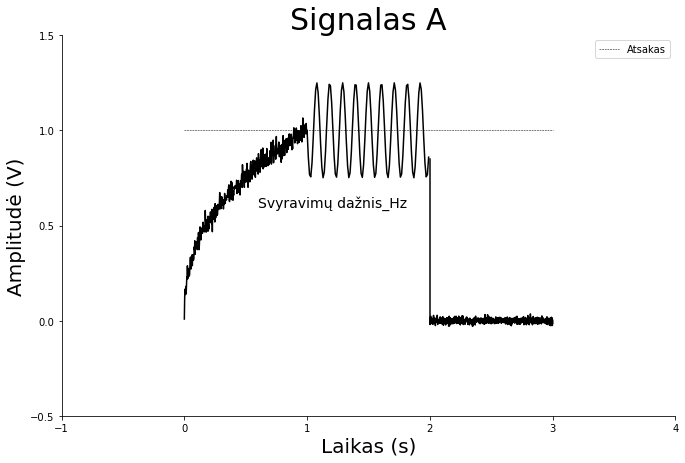

In [15]:
fig = plt.figure(figsize=(11, 7)) #Nurodome figūros dydį
plt.plot(x_fun,y_fun, 'black') #Pirmasis grafikas, nurodom x,y ir grafiko spalvą
plt.plot(t1,amplitude,'black') #Antrasis grafikas,nurodom x,y ir grafiko spalvą
plt.plot(t,noise,'black') #Trečiasis grafikas, nurodom x,y ir grafiko spalvą 
x=2                        #Spalvą galima rašyti kabutėse pilnu jos pavadinimu arba viena raide,pvz 'r' arba 'red'
a=0.85,0
b=x,x
plt.plot(b,a,'black') #Nubraižome liniją sujungiančią antrą ir trečią grafikus
x1=1
a1=0,3
b1=x1,x1
plt.plot(a1,b1,'black',linestyle='dashed',lw=0.5,label='Atsakas') #linestyle nurodom linijos stilių,lw nurodo storį linijų
plt.legend() #Sukuriame legendą
plt.xlabel('Laikas (s)', fontsize=20) #pavadiname x ašį, `fontsize` nurodo raidžių dydį
plt.ylabel('Amplitudė (V)', fontsize=20) #pavadiname y ašį, `fontsize` nurodo raidžių dydį
plt.title('Signalas A',fontsize=30) #sukuriame grafiko pavadinimą `plt.title`
plt.text(0.6, 0.6, 'Svyravimų dažnis_Hz', fontsize=14) #sukuriame tekstą su `plt.text`
plt.xticks([-1,0,1,2,3,4]) #Padarome x ašies tikcs su `plt.xtikcs`
plt.yticks([-0.5,0,0.5,1,1.5]) #Padarome y ašies tikcs su `plt.ytikcs`
plt.gca().spines['top'].set_visible(False) #Panaikiname viršutinę liniją
plt.gca().spines['right'].set_visible(False);#Panaikiname dešinę liniją

### b dalis

- Užrašome grafikų padėtį: pradžią(`left`), kur bus grafiko apačia(`bottom`), jo plotį(`width`) ir aukštį(`height`).
- Naudojame `plt.figure`, kad nubraižytume figūrą.
- Figūroje sukuriame ašis, kiekvienam grafikui, naudodami `.add_axes`.
- Pasirašome duomenis, kurių reikės grafikams: 
 - `spike` grafikui naudosim `np.exp` (skaičiuoja eksponentę);
 - sinusoidei nubraižyti naudosim `np.sin`(skaičiuos sinusus);
 - trečiasis grafikas yra `spike` ir `sinusoidės` grafikų sandauga.
- Su `plot` braižome visus grafikus. 
- Pagražiname grafikus naudodami `get_xaxis` ir `set_ticks`.
- Uždedame tekstą naudodami `text`, kuris vaizdžiau parodo, kaip gautas sandaugos signalas.

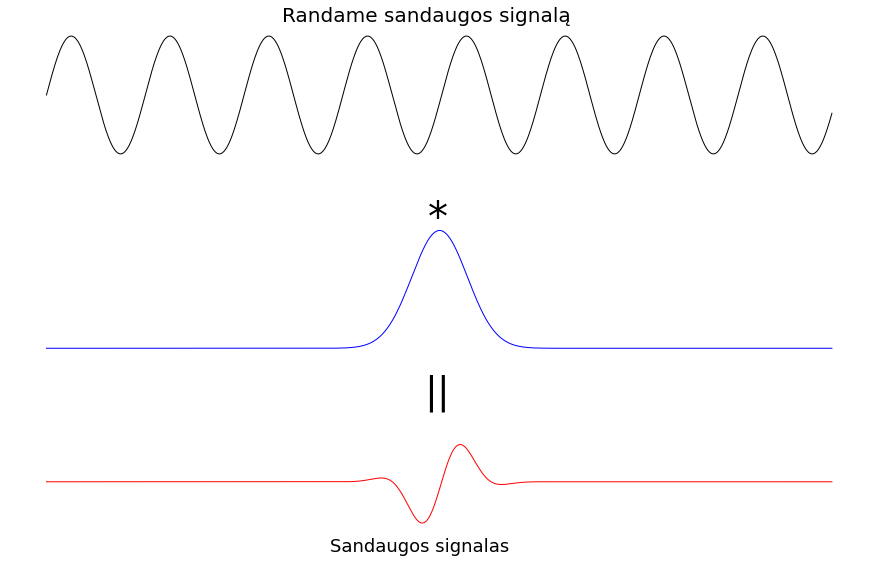

In [17]:
left, width = 0.1, 0.8
rect1 = [left, 0.75, width, 0.3]  # left, bottom, width, height
rect2 = [left, 0.3, width, 0.3]
rect3 = [left, -0.1, width, 0.2]

fig = plt.figure(figsize=(15, 6))

ax1 = fig.add_axes(rect1) 
ax2 = fig.add_axes(rect2,sharex=ax1)
ax3 = fig.add_axes(rect3, sharex=ax1)
s=5
sample_rate=100
spike = [sample_rate * 0.5]
time1= np.arange(0, 100, 0.1)
amplitude=np.sin(time1/2)
spike_train = (
    np.exp(-(((time1 - spike) / (s)) ** 2))
)

ax1.plot(time1,amplitude, color='black', lw=1)
ax2.plot(time1,  spike_train, color='blue', lw=1)
ax3.plot(time1, spike_train*amplitude, color='r', lw=1)

ax3.get_xaxis().set_ticks([])
for ax in [ax1, ax2, ax3]:
    for key in ['right', 'top', 'bottom','left']:
        ax.spines[key].set_visible(False)

plt.rcParams['ytick.left'] = False
plt.rcParams['ytick.labelleft'] = False

ax3.text(48, 1.5, '||', fontsize=38)
ax3.text(36, -1.3, 'Sandaugos signalas', fontsize=18)
ax2.text(48.5, 1, '*', fontsize=40)
ax1.text(30,1.25,'Randame sandaugos signalą', fontsize=20);


---
>> **3. UŽDUOTIS**
>>
>> Sukeltinio potencialo (ERP) skaičiavimas. Pandas ir numpy
>> bibliotekomis.
>>
>> Atliktas [Go/No-go eksperimentas](https://en.wikipedia.org/wiki/Go/no_go).
>> Tiriamieji girdėjo dviejų rūšių garsus.
>> Išgirdę garsą A turėjo paspausti mygtuką, išgirdę garsą B - nieko nedaryti.
>>
>> - Garso A atsiradimas fiksuotas įvykių faile žymeniu 1.
>> - Garso B atsiradimas --- žymeniu 2.
>> - Mygtuko paspaudimas --- 10.
>>
>> Duomenų failai:
>>
>> - EEG: exam/K2/GNG/*EEG.csv
>> - Atitinkami įvykių failai: exam/K2/GNG/*events.csv
>>
>> Žingsniai:
>>
>> - Duomenų automatinis importavimas ir sutvarkymas iš visų failų
>>   - suradimas teisingo nuskaitymo dažnio
>> - Įvykių išskyrimas ir duomenų suvidurkinimas pagal juos
>>   - radimas teisingų kartų kai žmogus girdėjo garsą A ir paspaudė mygtuką
>>   (Pradžioje buvo žymuo 1 ir po jo sekė žymuo 10)
>>   - Suskirstymas ir suvidurkinimas pagal žymenis
>> - Grafinis pavaizdavimas
>>
>> ![Cz](./Cz.png)
>>
>> ![Fz](./Fz.png)
>>
>> ![Oz](./Oz.png)
>>
>> ![Pz](./Pz.png)
>>
>>
---

## 3 uždavinys

EEG lentelėse penktame stulpelyje yra laikas ir jis sutampa su event lentelėse esančiu laiku. Tai pradžioje reiktų:
- išsikarpyti iš events lentelės teisingus duomenis (tinka, kur iš eilės eina 1 ir 10(gali būti ne viena tokia pora iš eilės) ir po 1 ir 10 eina 2, bet po jų gali būti tik 1 ir 10). Iš to gausime du grafikus, vienas bus 1-10 duomenų, kitas 2 duomenų;
- kadangi svarbi žymenų tvarka juos reiktų pasižymėti ir atsirinkti;
- kai turime duomenis reikėtų atrasti pagal laiką, kokia įtampa buvo registruota;
- kai turrėsime įtampos vertes, kurios atitinka laiką, galėsime braižyti grafikus.

In [18]:
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import os

In [19]:
def find_files(directory, pattern):            #Sukuriame funkciją, kuris padės surasti visus norimus failus
    files = []                                #Sukuriamas tuščias grafikas į kurį bus įrašomi failai
    p = pathlib.Path(directory).glob(pattern) #Nurodome, kad failo kelias bus sudarytas iš directory ir pattern
    files = [x for x in p]                    #Su glob ir jo simboliais lengviau galėsime surasti reikiamus failus
    return files


directory = 'C://Users//Win10//Desktop//programavimas//biod2021//exam//K2//GNG//' #Nurodome directory kelią
pattern='*EEG.csv'                             # `*` pakeičiamas į 0 arba daugiau simbolių, mūsų atvejų į skaičius nuo 1-10
EEG_files = find_files(directory,pattern)      
EEG_files

[WindowsPath('C:/Users/Win10/Desktop/programavimas/biod2021/exam/K2/GNG/10EEG.csv'),
 WindowsPath('C:/Users/Win10/Desktop/programavimas/biod2021/exam/K2/GNG/1EEG.csv'),
 WindowsPath('C:/Users/Win10/Desktop/programavimas/biod2021/exam/K2/GNG/2EEG.csv'),
 WindowsPath('C:/Users/Win10/Desktop/programavimas/biod2021/exam/K2/GNG/3EEG.csv'),
 WindowsPath('C:/Users/Win10/Desktop/programavimas/biod2021/exam/K2/GNG/4EEG.csv'),
 WindowsPath('C:/Users/Win10/Desktop/programavimas/biod2021/exam/K2/GNG/5EEG.csv'),
 WindowsPath('C:/Users/Win10/Desktop/programavimas/biod2021/exam/K2/GNG/6EEG.csv'),
 WindowsPath('C:/Users/Win10/Desktop/programavimas/biod2021/exam/K2/GNG/7EEG.csv'),
 WindowsPath('C:/Users/Win10/Desktop/programavimas/biod2021/exam/K2/GNG/8EEG.csv'),
 WindowsPath('C:/Users/Win10/Desktop/programavimas/biod2021/exam/K2/GNG/9EEG.csv')]

turbūt šitą veiksmą galima padaryti ir lengviau naudojant for ciklą

In [20]:
EEG1=pd.read_csv(EEG_files[0])             #Priskiriame failams stulpelių pavadinimus
EEG1.columns =['1', '2', '3', '4','5']     #Naudojam `.columns` pavadinti stulpelius

EEG2=pd.read_csv(EEG_files[1])             #Atidarome failus naudodami `pd.read_csv` 
EEG2.columns =['1', '2', '3', '4','5']     #Indeksavimas padeda nurodyti, kokį failą norime atidaryti

EEG3=pd.read_csv(EEG_files[2])
EEG3.columns =['1', '2', '3', '4','5']

EEG4=pd.read_csv(EEG_files[3])
EEG4.columns =['1', '2', '3', '4','5']

EEG5=pd.read_csv(EEG_files[4])
EEG5.columns =['1', '2', '3', '4','5']

EEG6=pd.read_csv(EEG_files[5])
EEG6.columns =['1', '2', '3', '4','5']

EEG7=pd.read_csv(EEG_files[6])
EEG7.columns =['1', '2', '3', '4','5']

EEG8=pd.read_csv(EEG_files[7])
EEG8.columns =['1', '2', '3', '4','5']

EEG9=pd.read_csv(EEG_files[8])
EEG9.columns =['1', '2', '3', '4','5']

In [21]:
def find_files1(directory1, pattern1):
    files1 = []
    p1 = pathlib.Path(directory1).glob(pattern1)
    files1 = [x for x in p1]
    return files1


directory1 = 'C://Users//Win10//Desktop//programavimas//biod2021//exam//K2//GNG//'
pattern1='*event.csv'
files1 = find_files(directory1,pattern1)
files1

[WindowsPath('C:/Users/Win10/Desktop/programavimas/biod2021/exam/K2/GNG/10event.csv'),
 WindowsPath('C:/Users/Win10/Desktop/programavimas/biod2021/exam/K2/GNG/1event.csv'),
 WindowsPath('C:/Users/Win10/Desktop/programavimas/biod2021/exam/K2/GNG/2event.csv'),
 WindowsPath('C:/Users/Win10/Desktop/programavimas/biod2021/exam/K2/GNG/3event.csv'),
 WindowsPath('C:/Users/Win10/Desktop/programavimas/biod2021/exam/K2/GNG/4event.csv'),
 WindowsPath('C:/Users/Win10/Desktop/programavimas/biod2021/exam/K2/GNG/5event.csv'),
 WindowsPath('C:/Users/Win10/Desktop/programavimas/biod2021/exam/K2/GNG/6event.csv'),
 WindowsPath('C:/Users/Win10/Desktop/programavimas/biod2021/exam/K2/GNG/7event.csv'),
 WindowsPath('C:/Users/Win10/Desktop/programavimas/biod2021/exam/K2/GNG/8event.csv'),
 WindowsPath('C:/Users/Win10/Desktop/programavimas/biod2021/exam/K2/GNG/9event.csv')]

In [22]:
event1=pd.read_csv(files1[0])
event1.columns=['Tag','Time,ms']

event2=pd.read_csv(files1[1])
event2.columns=['Tag','Time,ms']

event3=pd.read_csv(files1[2])
event3.columns=['Tag','Time,ms']

event4=pd.read_csv(files1[3])
event4.columns=['Tag','Time,ms']

event5=pd.read_csv(files1[4])
event5.columns=['Tag','Time,ms']

event6=pd.read_csv(files1[5])
event6.columns=['Tag','Time,ms']

event7=pd.read_csv(files1[6])
event7.columns=['Tag','Time,ms']

event8=pd.read_csv(files1[7])
event8.columns=['Tag','Time,ms']

event9=pd.read_csv(files1[8])
event9.columns=['Tag','Time,ms']

event10=pd.read_csv(files1[9])
event10.columns=['Tag','Time,ms']

In [23]:
Go=event1[(event1['Tag']==1) | (event1['Tag']==10)] #filtruojame, kad gautume lentelę tik iš 1 ir 10
Go.head()

Tag  Time,ms
1    1  87474.0
2   10  88218.0
3    1  89800.0
4   10  90866.0
5    1  92065.0

In [24]:
No_Go=event1[event1['Tag']==2] #filtruojame, kad gautume lentelę tik su 2
No_Go.head()

Tag   Time,ms
0     2   85180.0
7     2   94343.0
12    2  101290.0
13    2  103570.0
16    2  108260.0

In [25]:
time_col_go = pd.concat([Go['Time,ms'], EEG1['5']], join='outer') #sujungiame laiko stulpelius
time_col_go

1          87474.0
2          88218.0
3          89800.0
4          90866.0
5          92065.0
            ...   
440108    214900.0
440109    214900.0
440110    214900.0
440111    214900.0
440112    214900.0
Length: 440262, dtype: float64

In [26]:
time_col_nogo = pd.concat([No_Go['Time,ms'], EEG1['5']], join='outer')
time_col_nogo

0          85180.0
7          94343.0
12        101290.0
13        103570.0
16        108260.0
            ...   
440108    214900.0
440109    214900.0
440110    214900.0
440111    214900.0
440112    214900.0
Length: 440187, dtype: float64

In [27]:
table_bad_go = pd.concat([Go, EEG1], join='outer') #sukuriam lentelę, kurioje yra 1,10 žymenys ir EEG atitinkamos vertės
table_bad_go

Tag  Time,ms       1         2       3       4         5
1        1.0  87474.0     NaN       NaN     NaN     NaN       NaN
2       10.0  88218.0     NaN       NaN     NaN     NaN       NaN
3        1.0  89800.0     NaN       NaN     NaN     NaN       NaN
4       10.0  90866.0     NaN       NaN     NaN     NaN       NaN
5        1.0  92065.0     NaN       NaN     NaN     NaN       NaN
...      ...      ...     ...       ...     ...     ...       ...
440108   NaN      NaN  2.6003  0.258150 -2.3193 -1.3674  214900.0
440109   NaN      NaN  2.5549  0.206930 -2.3549 -1.3851  214900.0
440110   NaN      NaN  2.5076  0.157810 -2.3917 -1.4033  214900.0
440111   NaN      NaN  2.4586  0.111090 -2.4294 -1.4220  214900.0
440112   NaN      NaN  2.4081  0.067074 -2.4679 -1.4413  214900.0

[440262 rows x 7 columns]

In [28]:
table_better_go = table_bad_go.drop(columns=['5']) #iš lentelės išmetame 5 stulpelį, nes jis nereikalingas
table_better_go

Tag  Time,ms       1         2       3       4
1        1.0  87474.0     NaN       NaN     NaN     NaN
2       10.0  88218.0     NaN       NaN     NaN     NaN
3        1.0  89800.0     NaN       NaN     NaN     NaN
4       10.0  90866.0     NaN       NaN     NaN     NaN
5        1.0  92065.0     NaN       NaN     NaN     NaN
...      ...      ...     ...       ...     ...     ...
440108   NaN      NaN  2.6003  0.258150 -2.3193 -1.3674
440109   NaN      NaN  2.5549  0.206930 -2.3549 -1.3851
440110   NaN      NaN  2.5076  0.157810 -2.3917 -1.4033
440111   NaN      NaN  2.4586  0.111090 -2.4294 -1.4220
440112   NaN      NaN  2.4081  0.067074 -2.4679 -1.4413

[440262 rows x 6 columns]

In [29]:
table_better_go['Time,ms'] = time_col_go #laiko vertėms priskiriame stulpelį, kuriame EEG vertės laike atitinka žymenų paspaudimą laike

In [30]:
table_bad_nogo = pd.concat([No_Go, EEG1], join='outer')
table_bad_nogo

Tag   Time,ms       1         2       3       4         5
0       2.0   85180.0     NaN       NaN     NaN     NaN       NaN
7       2.0   94343.0     NaN       NaN     NaN     NaN       NaN
12      2.0  101290.0     NaN       NaN     NaN     NaN       NaN
13      2.0  103570.0     NaN       NaN     NaN     NaN       NaN
16      2.0  108260.0     NaN       NaN     NaN     NaN       NaN
...     ...       ...     ...       ...     ...     ...       ...
440108  NaN       NaN  2.6003  0.258150 -2.3193 -1.3674  214900.0
440109  NaN       NaN  2.5549  0.206930 -2.3549 -1.3851  214900.0
440110  NaN       NaN  2.5076  0.157810 -2.3917 -1.4033  214900.0
440111  NaN       NaN  2.4586  0.111090 -2.4294 -1.4220  214900.0
440112  NaN       NaN  2.4081  0.067074 -2.4679 -1.4413  214900.0

[440187 rows x 7 columns]

In [31]:
table_better_nogo = table_bad_nogo.drop(columns=['5'])
table_better_nogo

Tag   Time,ms       1         2       3       4
0       2.0   85180.0     NaN       NaN     NaN     NaN
7       2.0   94343.0     NaN       NaN     NaN     NaN
12      2.0  101290.0     NaN       NaN     NaN     NaN
13      2.0  103570.0     NaN       NaN     NaN     NaN
16      2.0  108260.0     NaN       NaN     NaN     NaN
...     ...       ...     ...       ...     ...     ...
440108  NaN       NaN  2.6003  0.258150 -2.3193 -1.3674
440109  NaN       NaN  2.5549  0.206930 -2.3549 -1.3851
440110  NaN       NaN  2.5076  0.157810 -2.3917 -1.4033
440111  NaN       NaN  2.4586  0.111090 -2.4294 -1.4220
440112  NaN       NaN  2.4081  0.067074 -2.4679 -1.4413

[440187 rows x 6 columns]

---
>> **4. UŽDUOTIS**
>>
>>
>> ![Result](./Apklausos/Emotions.png)
>>
>> duomenys direktorijoje Apklausos/.
>>
>> Muzikantai grojo kūrinius ir stengėsi perteikti emociją. Grota emocija užkoduota list..csv failuose. Pvz:
>> aud/009_2_4_Distressed.ogg -> 'Distressed' - susikrimtęs - bandyta perteikti emocija.
>>
>> Vėliau žmonės klausėsi grojimo ir bandė nuspėti kokią emociją bandė perteikti atlikėjai. Duomenys pateikti Emotional_evaluation... failuose.
>>
>> - list..csv failuose pateiktas eiliškumas garsų atsispindi Emotional_evaluation.csv failuose esančiame numeracijoje.
>> - Pirmo garso valentingumas ir sužadinamumas įvertintas ties klausimu
(1.1 Please indicate valence and arousal ratings), Valence ir Arousal stulpeliuose. Spėjama emocija viename iš stulpelių ties (1.2 Please indicate which emotion the piece was aiming to transfer)
>> - Kiekvienas Emotion... failas turi savo atitikmenį list... pvz: Emotional_evaluation_01.xlsx pagalbinis failas list_01.csv
---
>>
>> - Sujunkite visus duomenų failus į vieną lentelę.
>> - Kiek žmonių atliko apklausą? Iš kokių valstybių ir miestų dalyviai? Vidutinė apklausos trukmė? Vyrų ir moterų santykis? Vidutinis amžius? Koks apklaustų žmonių muzikinis išsilavinimas?
>> - Atkartokite grafiką naudojant pateiktus duomenis. Ar pavyko muzikantams perteikti emociją?
>>   - Naudodami apklausos įvertinimus sklaidos grafike ir nuspalvindami taškus norėta perteikti muzikantų emocija.
>>
>> Pavyzdinis grafikas su kitais duomenimis
>>
>> ![Result](./Apklausos/result.png)
>>

---

In [32]:
def find_files2(directory2, pattern2):              #Sukuriame funkciją, kuris padės surasti visus norimus failus
    files2 = []                                     #Sukuriamas tuščias grafikas į kurį bus įrašomi failai
    p2 = pathlib.Path(directory2).glob(pattern2)    #Nurodome, kad failo kelias bus sudarytas iš directory ir pattern
    files2 = [x for x in p2]                        #Su glob ir jo simboliais lengviau galėsime surasti reikiamus failus
    return files2


directory2 = 'C://Users//Win10//Desktop//programavimas//biod2021//exam//K2//Apklausos//'
pattern2='list_*.csv'                               # `*` pakeičiamas į 0 arba daugiau simbolių, mūsų atvejų į skaičius nuo 1-10
files2 = find_files2(directory2,pattern2)
files2

[WindowsPath('C:/Users/Win10/Desktop/programavimas/biod2021/exam/K2/Apklausos/list_01.csv'),
 WindowsPath('C:/Users/Win10/Desktop/programavimas/biod2021/exam/K2/Apklausos/list_02.csv'),
 WindowsPath('C:/Users/Win10/Desktop/programavimas/biod2021/exam/K2/Apklausos/list_03.csv')]

In [33]:
lists1=pd.read_csv(files2[0]) #Atidarome visus failus naudojant `pd.read_csv`
lists2=pd.read_csv(files2[1]) #Atidarytiems failams priskiriame vardus, kad lengviau būtų juos sujungt
lists3=pd.read_csv(files2[2]) #Naudojam indeksavimą, kad nurodyti, kurį failą norime atidaryti iš surastų reikiamų

In [37]:
lists1['audiofile']=lists1['audiofile'].str.replace('aud','') #Panaikinam nereikalingus simbolius iš lentelės,naudodami `str.replace`
lists1['audiofile']=lists1['audiofile'].str.replace('/','')
lists1['audiofile']=lists1['audiofile'].str.replace('___','')
lists1['audiofile']=lists1['audiofile'].str.replace('ogg','')
lists1['converted']=lists1['converted'].str.replace('set_1','')
lists1['converted']=lists1['converted'].str.replace('/','')
lists1['converted']=lists1['converted'].str.replace('ogg','')
lists1['audiofile']=lists1['audiofile'].str.replace('\d','')
lists1['audiofile']=lists1['audiofile'].str.replace('\.','')
lists1['converted']=lists1['converted'].str.replace('\.','')

<ipython-input-37-001818074a82>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  lists1['audiofile']=lists1['audiofile'].str.replace('\d','')
<ipython-input-37-001818074a82>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  lists1['audiofile']=lists1['audiofile'].str.replace('\.','')
<ipython-input-37-001818074a82>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  lists1['converted']=lists1['converted'].str.replace('\.','')


In [38]:
lists1

audiofile converted
0    Depressed         1
1    Depressed         2
2   Distressed         3
3      Excited         4
4      Neutral         5
5   Distressed         6
6      Neutral         7
7      Relaxed         8
8    Depressed         9
9    Depressed        10
10     Excited        11
11   Depressed        12
12     Excited        13
13   Depressed        14
14   Depressed        15
15     Excited        16
16     Neutral        17
17   Depressed        18
18     Relaxed        19
19     Excited        20
20  Distressed        21
21     Neutral        22
22     Neutral        23
23     Neutral        24
24   Depressed        25
25     Excited        26
26  Distressed        27
27  Distressed        28
28     Relaxed        29
29     Excited        30
30     Neutral        31
31     Neutral        32
32     Excited        33
33     Relaxed        34
34  Distressed        35
35     Excited        36
36     Relaxed        37
37     Relaxed        38
38   Depressed        39
39     Excited        40
40     Neutral        41
41     Relaxed        42
42  Distressed        43
43     Relaxed        44
44     Relaxed        45
45     Neutral        46
46  Distressed        47
47     Relaxed        48
48  Distressed        49
49  Distressed        50

In [39]:
lists2['audiofile']=lists2['audiofile'].str.replace('\d','')
lists2['audiofile']=lists2['audiofile'].str.replace('aud','')
lists2['audiofile']=lists2['audiofile'].str.replace('/','')
lists2['audiofile']=lists2['audiofile'].str.replace('\.','')
lists2['audiofile']=lists2['audiofile'].str.replace('___','')
lists2['audiofile']=lists2['audiofile'].str.replace('ogg','')
lists2['converted']=lists2['converted'].str.replace('set_2','')
lists2['converted']=lists2['converted'].str.replace('/','')
lists2['converted']=lists2['converted'].str.replace('ogg','')
lists2['converted']=lists2['converted'].str.replace('\.','')

<ipython-input-39-a14c88e317fc>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  lists2['audiofile']=lists2['audiofile'].str.replace('\d','')
<ipython-input-39-a14c88e317fc>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  lists2['audiofile']=lists2['audiofile'].str.replace('\.','')
<ipython-input-39-a14c88e317fc>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  lists2['converted']=lists2['converted'].str.replace('\.','')


In [40]:
lists2

audiofile converted
0      Relaxed         1
1      Excited         2
2      Neutral         3
3      Neutral         4
4    Depressed         5
5    Depressed         6
6      Relaxed         7
7    Depressed         8
8      Excited         9
9      Neutral        10
10  Distressed        11
11     Relaxed        12
12  Distressed        13
13     Excited        14
14     Excited        15
15  Distressed        16
16  Distressed        17
17     Neutral        18
18   Depressed        19
19  Distressed        20
20     Excited        21
21     Relaxed        22
22  Distressed        23
23     Relaxed        24
24     Excited        25
25     Relaxed        26
26     Relaxed        27
27     Neutral        28
28     Excited        29
29     Relaxed        30
30     Neutral        31
31     Excited        32
32   Depressed        33
33     Excited        34
34  Distressed        35
35     Neutral        36
36     Neutral        37
37     Neutral        38
38   Depressed        39
39   Depressed        40
40  Distressed        41
41     Excited        42
42   Depressed        43
43  Distressed        44
44     Relaxed        45
45     Neutral        46
46  Distressed        47
47   Depressed        48
48     Relaxed        49
49   Depressed        50

In [41]:
lists3['audiofile']=lists3['audiofile'].str.replace('\d','')
lists3['audiofile']=lists3['audiofile'].str.replace('\.','')
lists3['audiofile']=lists3['audiofile'].str.replace('aud','')
lists3['audiofile']=lists3['audiofile'].str.replace('/','')
lists3['audiofile']=lists3['audiofile'].str.replace('___','')
lists3['audiofile']=lists3['audiofile'].str.replace('ogg','')
lists3['converted']=lists3['converted'].str.replace('set_3','')
lists3['converted']=lists3['converted'].str.replace('/','')
lists3['converted']=lists3['converted'].str.replace('ogg','')
lists3['converted']=lists3['converted'].str.replace('\.','')

<ipython-input-41-be077c2b0f78>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  lists3['audiofile']=lists3['audiofile'].str.replace('\d','')
<ipython-input-41-be077c2b0f78>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  lists3['audiofile']=lists3['audiofile'].str.replace('\.','')
<ipython-input-41-be077c2b0f78>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  lists3['converted']=lists3['converted'].str.replace('\.','')


In [42]:
lists3

audiofile converted
0   Distressed         1
1      Excited         2
2      Relaxed         3
3    Depressed         4
4    Depressed         5
5      Relaxed         6
6      Excited         7
7      Excited         8
8    Depressed         9
9   Distressed        10
10     Relaxed        11
11  Distressed        12
12  Distressed        13
13     Neutral        14
14     Neutral        15
15   Depressed        16
16     Excited        17
17  Distressed        18
18     Excited        19
19     Relaxed        20
20     Excited        21
21     Neutral        22
22     Relaxed        23
23     Excited        24
24     Neutral        25
25     Excited        26
26   Depressed        27
27     Neutral        28
28     Relaxed        29
29   Depressed        30
30   Depressed        31
31   Depressed        32
32  Distressed        33
33     Relaxed        34
34     Relaxed        35
35     Neutral        36
36     Excited        37
37     Excited        38
38     Neutral        39
39  Distressed        40
40  Distressed        41
41     Neutral        42
42     Neutral        43
43     Relaxed        44
44  Distressed        45
45   Depressed        46
46   Depressed        47
47     Relaxed        48
48     Neutral        49
49  Distressed        50

In [43]:
def find_files3(directory3, pattern3):
    files3 = []
    p3 = pathlib.Path(directory3).glob(pattern3)
    files3 = [x for x in p3]
    return files3


directory3 = 'C://Users//Win10//Desktop//programavimas//biod2021//exam//K2//Apklausos//'
pattern3='Emotional_evaluation_*.xlsx'
files3 = find_files3(directory3,pattern3)
files3

[WindowsPath('C:/Users/Win10/Desktop/programavimas/biod2021/exam/K2/Apklausos/Emotional_evaluation_01.xlsx'),
 WindowsPath('C:/Users/Win10/Desktop/programavimas/biod2021/exam/K2/Apklausos/Emotional_evaluation_02.xlsx'),
 WindowsPath('C:/Users/Win10/Desktop/programavimas/biod2021/exam/K2/Apklausos/Emotional_evaluation_03.xlsx')]

In [44]:
apklausa1=pd.read_excel(files3[0],skiprows=1) #Atidarome visus failus naudojant `pd.read_excel`
apklausa2=pd.read_excel(files3[1],skiprows=1) #Failams priskiriame vardus, kad lengviau būtų juos sujungt
apklausa3=pd.read_excel(files3[2],skiprows=1) #`skiprows`praleidžiame pirmą eilutę, kad lengviau pasiekti reikiamus duomenis

In [45]:
apklausa=pd.concat([apklausa1,apklausa2,apklausa3],join='outer') #Sujungiame visas apklausas į vieną lentelę,naudojam `pd.concat` 
apklausa

Unnamed: 0  Unnamed: 1 Unnamed: 2 Unnamed: 3  Unnamed: 4  \
0  2020-12-30 19:32:04 +0200        1709  Lithuania    Vilnius         NaN   
1  2021-02-18 13:21:42 +0200        1180     Latvia        NaN         NaN   
2  2021-03-09 16:31:42 +0200        1114  Lithuania    Palanga         NaN   
0  2020-12-30 13:37:57 +0200        1739  Lithuania    Vilnius         NaN   
1  2021-02-18 12:07:31 +0200        1160     Latvia       Riga         NaN   
2  2021-03-10 16:27:17 +0200        1705  Lithuania    Vilnius         NaN   
3  2021-03-13 13:24:03 +0200        1573  Lithuania    Vilnius         NaN   
0  2020-12-30 14:35:36 +0200        2125  Lithuania    Vilnius         NaN   
1  2021-02-17 21:03:06 +0200        2149     Latvia       Riga         NaN   
2  2021-03-09 22:29:04 +0200        2301  Lithuania  Širvintos         NaN   
3  2021-03-12 08:43:47 +0200        1547    Belgium    Melsele         NaN   

   Female  Male  Unnamed: 7    0  1-5 years  ...  Neutral.48  Relaxed.48  \
0     NaN   1.0          25  1.0        NaN  ...         NaN         1.0   
1     NaN   1.0          22  NaN        NaN  ...         NaN         NaN   
2     1.0   NaN          28  NaN        NaN  ...         NaN         1.0   
0     1.0   NaN          24  NaN        1.0  ...         NaN         1.0   
1     NaN   1.0          23  NaN        NaN  ...         NaN         1.0   
2     1.0   NaN          33  NaN        NaN  ...         NaN         NaN   
3     NaN   1.0          55  1.0        NaN  ...         NaN         NaN   
0     NaN   1.0          25  NaN        1.0  ...         NaN         1.0   
1     1.0   NaN          23  NaN        NaN  ...         1.0         NaN   
2     1.0   NaN          49  NaN        NaN  ...         NaN         NaN   
3     1.0   NaN          29  NaN        NaN  ...         1.0         NaN   

   Excited.48  Valence.49  Arousal.49  Depressed.49  Distressed.49  \
0         NaN           4           7           NaN            1.0   
1         1.0           2           9           NaN            1.0   
2         NaN           7           8           1.0            NaN   
0         NaN           4           6           NaN            1.0   
1         NaN           5           5           NaN            1.0   
2         1.0           3           8           NaN            1.0   
3         NaN           8           4           1.0            NaN   
0         NaN           3           4           NaN            1.0   
1         NaN           4           7           NaN            1.0   
2         NaN           1           6           1.0            NaN   
3         NaN           3           4           NaN            NaN   

   Neutral.49  Relaxed.49  Excited.49  
0         NaN         NaN         NaN  
1         NaN         NaN         NaN  
2         NaN         NaN         NaN  
0         NaN         NaN         NaN  
1         NaN         NaN         NaN  
2         NaN         NaN         NaN  
3         NaN         NaN         NaN  
0         NaN         NaN         NaN  
1         NaN         NaN         NaN  
2         NaN         NaN         NaN  
3         NaN         NaN         1.0  

[11 rows x 362 columns]

In [46]:
lists=pd.concat([lists1,lists2,lists3],join='outer') #Sujungiame visus list į vieną lentelę,naudojam `pd.concat` 
lists = lists.drop(columns=["converted"])


In [47]:
lists_rev=lists.transpose()

In [48]:
main_table=pd.concat([apklausa,lists],join='outer') #Sujungiame lists ir apklausos lenteles
main_table 

Unnamed: 0  Unnamed: 1 Unnamed: 2 Unnamed: 3  Unnamed: 4  \
0   2020-12-30 19:32:04 +0200      1709.0  Lithuania    Vilnius         NaN   
1   2021-02-18 13:21:42 +0200      1180.0     Latvia        NaN         NaN   
2   2021-03-09 16:31:42 +0200      1114.0  Lithuania    Palanga         NaN   
0   2020-12-30 13:37:57 +0200      1739.0  Lithuania    Vilnius         NaN   
1   2021-02-18 12:07:31 +0200      1160.0     Latvia       Riga         NaN   
..                        ...         ...        ...        ...         ...   
45                        NaN         NaN        NaN        NaN         NaN   
46                        NaN         NaN        NaN        NaN         NaN   
47                        NaN         NaN        NaN        NaN         NaN   
48                        NaN         NaN        NaN        NaN         NaN   
49                        NaN         NaN        NaN        NaN         NaN   

    Female  Male  Unnamed: 7    0  1-5 years  ...  Relaxed.48  Excited.48  \
0      NaN   1.0        25.0  1.0        NaN  ...         1.0         NaN   
1      NaN   1.0        22.0  NaN        NaN  ...         NaN         1.0   
2      1.0   NaN        28.0  NaN        NaN  ...         1.0         NaN   
0      1.0   NaN        24.0  NaN        1.0  ...         1.0         NaN   
1      NaN   1.0        23.0  NaN        NaN  ...         1.0         NaN   
..     ...   ...         ...  ...        ...  ...         ...         ...   
45     NaN   NaN         NaN  NaN        NaN  ...         NaN         NaN   
46     NaN   NaN         NaN  NaN        NaN  ...         NaN         NaN   
47     NaN   NaN         NaN  NaN        NaN  ...         NaN         NaN   
48     NaN   NaN         NaN  NaN        NaN  ...         NaN         NaN   
49     NaN   NaN         NaN  NaN        NaN  ...         NaN         NaN   

    Valence.49  Arousal.49  Depressed.49  Distressed.49  Neutral.49  \
0          4.0         7.0           NaN            1.0         NaN   
1          2.0         9.0           NaN            1.0         NaN   
2          7.0         8.0           1.0            NaN         NaN   
0          4.0         6.0           NaN            1.0         NaN   
1          5.0         5.0           NaN            1.0         NaN   
..         ...         ...           ...            ...         ...   
45         NaN         NaN           NaN            NaN         NaN   
46         NaN         NaN           NaN            NaN         NaN   
47         NaN         NaN           NaN            NaN         NaN   
48         NaN         NaN           NaN            NaN         NaN   
49         NaN         NaN           NaN            NaN         NaN   

    Relaxed.49  Excited.49   audiofile  
0          NaN         NaN         NaN  
1          NaN         NaN         NaN  
2          NaN         NaN         NaN  
0          NaN         NaN         NaN  
1          NaN         NaN         NaN  
..         ...         ...         ...  
45         NaN         NaN   Depressed  
46         NaN         NaN   Depressed  
47         NaN         NaN     Relaxed  
48         NaN         NaN     Neutral  
49         NaN         NaN  Distressed  

[161 rows x 363 columns]

### Kiek žmonių atliko apklausą?

In [51]:
female=apklausa['Female'].sum() #Suskaičiuojam su `sum` kiek yra moterų

male=apklausa['Male'].sum() #Suskaičiuojam su `sum` kiek yra vyrų

participants = female + male #Sudedame moterų ir vyrų kiekį

print('Žmonių atlikusių apklausą skaičius:',participants) #Atspausdiname, kiek yra žmonių


Žmonių atlikusių apklausą skaičius: 11.0


### Iš kokių valstybių ir miestų dalyviai? 

In [52]:
apklausa1=pd.read_excel(files3[0]) #Atidarome visus failus naudojant `pd.read_excel`
apklausa2=pd.read_excel(files3[1]) #Failams priskiriame vardus, kad lengviau būtų juos sujungt
apklausa3=pd.read_excel(files3[2])
mer3=pd.concat([apklausa1,apklausa2,apklausa3],join='outer') #Sujungiame visas aklausos lenteles į vieną, bet nepraleidžiam pirmos eilutės


In [53]:
country=mer3['Country'] #Atspausdiname šalių stulpelį
country

0          NaN
1    Lithuania
2       Latvia
3    Lithuania
0          NaN
1    Lithuania
2       Latvia
3    Lithuania
4    Lithuania
0          NaN
1    Lithuania
2       Latvia
3    Lithuania
4      Belgium
Name: Country, dtype: object

In [54]:
print('Šalys: Lietuva, Latvija, Belgija')

Šalys: Lietuva, Latvija, Belgija


In [55]:
mer3['City'] #Atspausdiname miestų stulpelį

0          NaN
1      Vilnius
2          NaN
3      Palanga
0          NaN
1      Vilnius
2         Riga
3      Vilnius
4      Vilnius
0          NaN
1      Vilnius
2         Riga
3    Širvintos
4      Melsele
Name: City, dtype: object

In [56]:
print('Miesatai: Vilnius, Palanga, Širvintos, Riga, Melsele')

Miesatai: Vilnius, Palanga, Širvintos, Riga, Melsele


### Vyrų ir moterų santykis? 

In [57]:
print(f" Moterys sudaro {female/participants*100:.3}% visų dalyvių") #Atspausdiname, kiek procentų moterų sudaro visų dalyvių
                                                                     #`.3`naudojame, kad atspausidntų atsakymą su trimis reikšminiais skaičiais 

 Moterys sudaro 54.5% visų dalyvių


In [58]:
print(f" Vyrai sudaro {male/participants*100:.3}% visų dalyvių")

 Vyrai sudaro 45.5% visų dalyvių


### Vidutinė apklausos trukmė? 


In [59]:
ap_mean=mer3['Duration (s)'].mean() #Naudojant `mean`, apskaičiuojam `Duration (s)` apklausos trukmės vidurkį
print(f'Apklausos vidutinė trukmė minutėmis {ap_mean/60:.3}min')

Apklausos vidutinė trukmė minutėmis 27.7min


### Vidutinis amžius? 


In [60]:
age=mer3['Please indicate your age:'].mean()
print(f'Apklaustųjų vidutinis amžius {age:.3}')

Apklaustųjų vidutinis amžius 30.5


### Koks apklaustų žmonių muzikinis išsilavinimas?

In [62]:
never=apklausa[0].sum()
print('Žmonių kiekis, kurie neturi muzikinio išsilavinimo: ',never)

Žmonių kiekis, kurie neturi muzikinio išsilavinimo:  2.0


In [64]:
one_five=apklausa['1-5 years'].sum()
print('Žmonių kiekis, kurie turi 1-5 metų muzikinį išsilavinimą:',one_five)

Žmonių kiekis, kurie turi 1-5 metų muzikinį išsilavinimą: 2.0


In [65]:
six_ten=apklausa['6-10 years'].sum()
print('Žmonių kiekis, kurie turi 6-10 metų muzikinį išsilavinimą:',six_ten)

Žmonių kiekis, kurie turi 6-10 metų muzikinį išsilavinimą: 1.0


In [66]:
eleven_more=apklausa['11 and more'].sum()
print('Žmonių kiekis, kurie turi 11 metų ir daugiau muzikinį išsilavinimą:',eleven_more)

Žmonių kiekis, kurie turi 11 metų ir daugiau muzikinį išsilavinimą: 6.0


Norint nubrėžti viršuje esantį paveikslėlį, turbūt reikėtų naudoti kažką panašaus į šias funkcijas

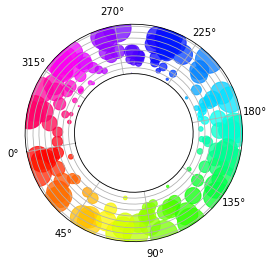

In [69]:
fig = plt.figure()
ax = fig.add_subplot(projection='polar')
N = 150
r = 2 * np.random.rand(N)
theta = 2 * np.pi * np.random.rand(N)
area = 200 * r**2
colors = theta

c = ax.scatter(theta, r, c=colors, s=area, cmap='hsv', alpha=0.75)

ax.set_rorigin(-2.5)
ax.set_theta_zero_location('W', offset=10)

Norint nubrėžti galutinį grafiką, turbūt reikėtų pasinaudoti šiuo grafiko braižymo tipu.

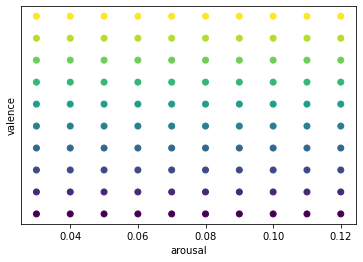

In [97]:
fig, ax = plt.subplots()
dots = np.arange(10) / 100. + .03
x, y = np.meshgrid(dots, dots)
data = [x.ravel(), y.ravel()]
ax.scatter(*data, c=data[1])
plt.xlabel('arousal')
plt.ylabel('valence')
plt.show()


